# Develop a program to implement k-Nearest Neighbour algorithm to classify the randomly generated 100 values of x in the range of [0,1].
Perform the following based on dataset generated.
- Label the first 50 points {x1,…,x50} as follows: if (x_i≤ 0.5), then x_i∈Class_1, else x_i∈Class_1
- Classify the remaining points, x51,…,x100 using KNN. Perform this for k=1,2,3,4,5,20,30

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Data Generation and Labeling:
- Generates 100 random points between 0 and 1
- Labels first 50 points based on the condition (x_i ≤ 0.5)
- Splits into training (first 50) and testing (last 50) sets

In [2]:
# Generate and label the data
np.random.seed(42)  # for reproducibility
X = np.random.rand(100, 1)  # Generate 100 random points between 0 and 1

# Label first 50 points
y = np.zeros(100)  # Initialize labels array
for i in range(50):
    if X[i] <= 0.5:
        y[i] = 0  # Class 1
    else:
        y[i] = 1  # Class 2

# Split data into training (first 50) and testing (last 50)
X_train = X[:50]
y_train = y[:50]
X_test = X[50:]
y_test = y[50:]

## KNN Classification Function:
- Implements kNN algorithm using scikit-learn
- Creates visualizations showing:
    - Training data distribution
    - Test data predictions
    - Decision boundary at x=0.5

In [9]:
# Function to perform kNN classification and visualization
def knn_classify_and_plot(k):
    # Create and train the kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Get predictions
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)
    
    # Plotting
    plt.figure(figsize=(10, 4))
    
    # Plot training data
    plt.subplot(1, 2, 1)
    plt.scatter(X_train[y_train == 0], np.zeros_like(X_train[y_train == 0]), 
                c='red', label='Class 1 (Training)')
    plt.scatter(X_train[y_train == 1], np.zeros_like(X_train[y_train == 1]), 
                c='blue', label='Class 2 (Training)')
    plt.axvline(x=0.5, color='green', linestyle='--', label='Decision Boundary')
    plt.title(f'Training Data (First 50 points)')
    plt.legend()
    
    # Plot test data with predictions
    plt.subplot(1, 2, 2)
    plt.scatter(X_test[y_pred == 0], np.zeros_like(X_test[y_pred == 0]), 
                c='red', label='Predicted Class 1')
    plt.scatter(X_test[y_pred == 1], np.zeros_like(X_test[y_pred == 1]), 
                c='blue', label='Predicted Class 2')
    plt.axvline(x=0.5, color='green', linestyle='--', label='True Boundary')
    plt.title(f'Test Predictions (k={k}, Accuracy={accuracy:.2f})')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return accuracy

## Visualization for Each k:
- Left plot: Shows training data points and true boundary
- Right plot: Shows test predictions and accuracy
- Points are colored by class (red for Class 1, blue for Class 2)


Classification with k = 1


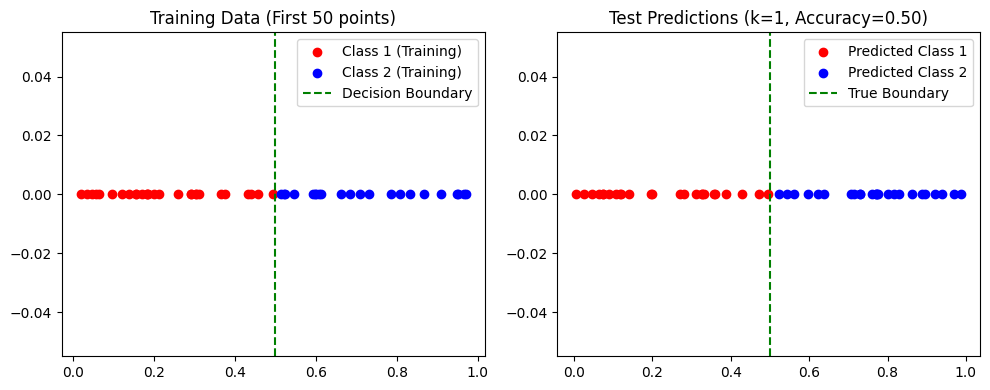


Classification with k = 2


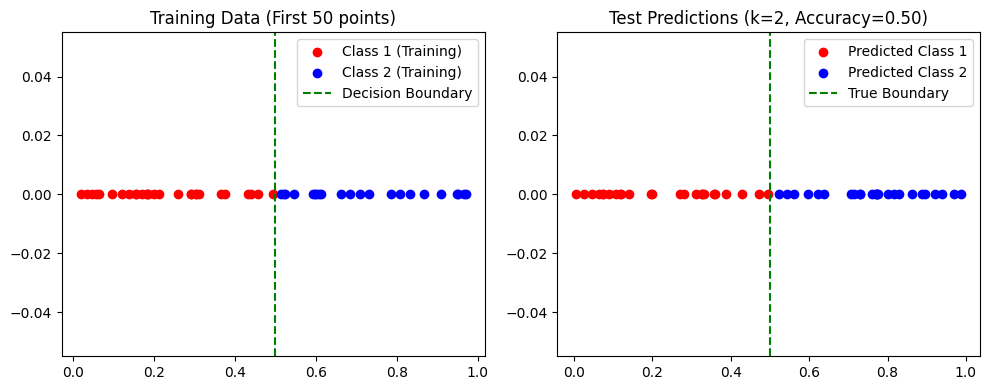


Classification with k = 3


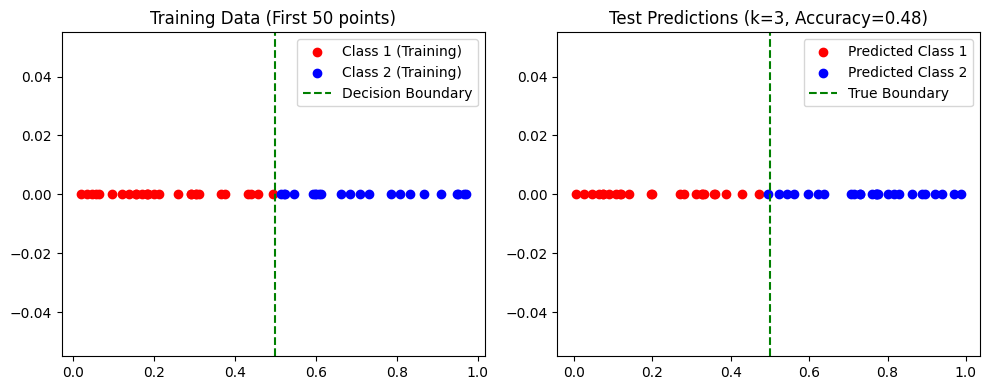


Classification with k = 4


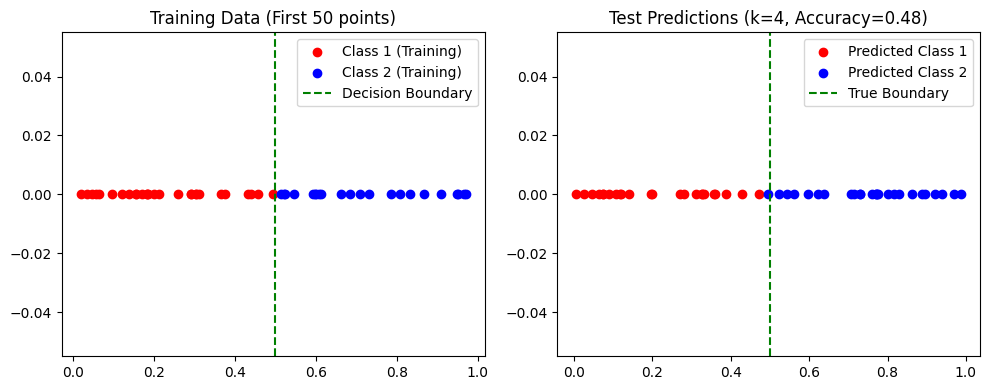


Classification with k = 5


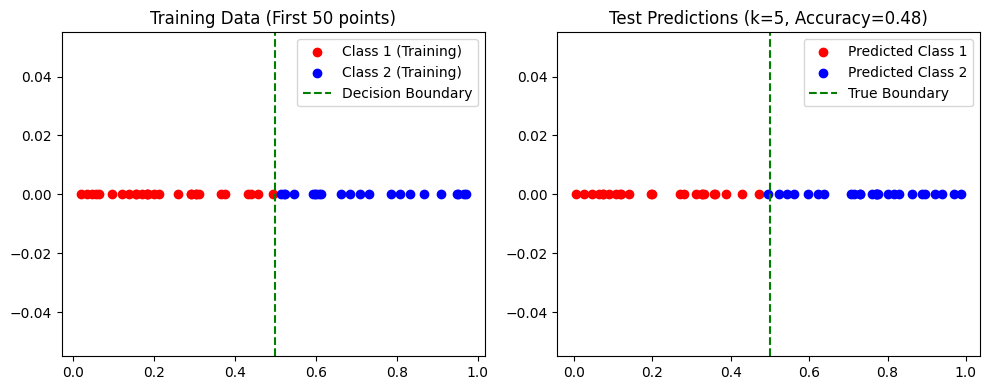


Classification with k = 20


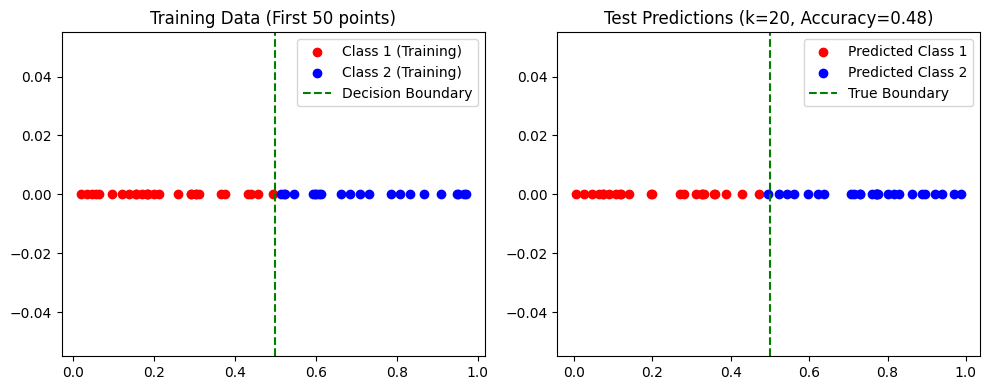


Classification with k = 30


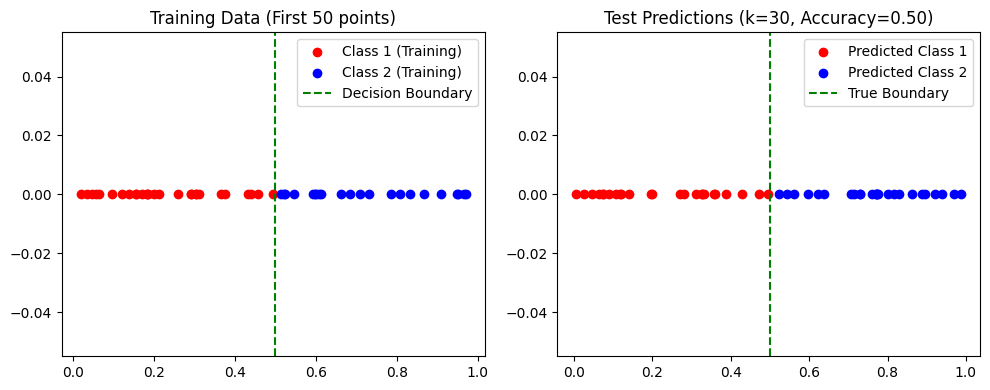

In [11]:
# Run kNN for different k values
k_values = [1, 2, 3, 4, 5, 20, 30]
accuracies = []

for k in k_values:
    print(f"\nClassification with k = {k}")
    accuracy = knn_classify_and_plot(k)
    accuracies.append(accuracy)

## Performance Analysis:
- Tests different k values: 1, 2, 3, 4, 5, 20, 30
- Plots accuracy vs k value
- Shows how k affects classification performance

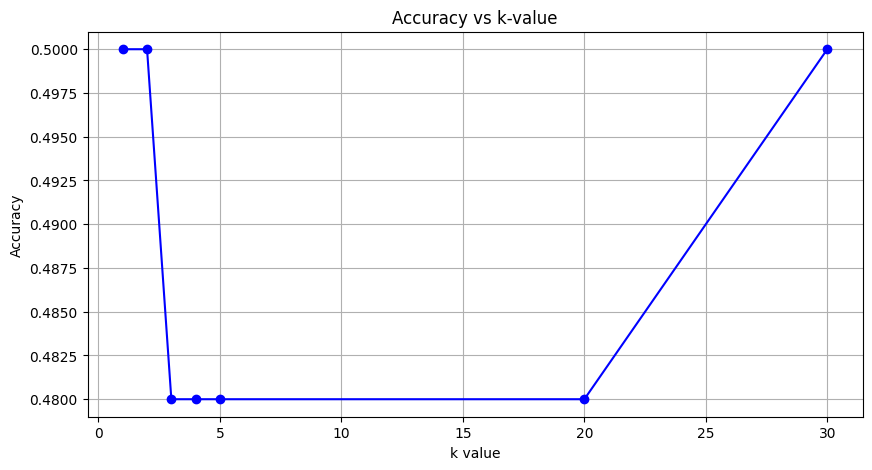

In [14]:
# Plot accuracies for different k values
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, 'bo-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k-value')
plt.grid(True)
plt.show()

## Key Observations:
1. With small k (1-5):
    - More sensitive to local patterns
    - May overfit to training data

2. With large k (20-30):
    - More stable predictions
    - May lose local patterns
    - etter for this simple boundary case


3. Even k values:
    - May lead to ties in voting
    - Generally odd k values are preferred